In [138]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [139]:
#importing the datasets
df = pd.read_csv("C:/Users/HP PRO/Desktop/python/h1b_kaggle.csv") #train dataset

In [140]:
#Printing the Data
df = df.rename(columns={'Unnamed: 0': 'ID'})

df.head()

,ID,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [141]:
#Dropping the columns which are not required
#df = df.drop(['EMPLOYER_NAME'], axis=1)
df.isnull().sum()

ID                         0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [142]:
#preparing and cleaning the data

df = df.drop(['lon', 'lat'], axis=1)
#df = df.dropna(subset=['JOB_TITLE'])
df = df.dropna()
df['YEAR'] = df['YEAR'].astype(int)


df['PREVAILING_WAGE'] = df['PREVAILING_WAGE'].astype(int)


In [143]:
df = df.drop(['ID'], axis = 1)

In [144]:
df['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'], dtype=object)

In [145]:
df['FULL_TIME_POSITION'].unique()

array(['N', 'Y'], dtype=object)

In [146]:
df['CASE_STATUS'].value_counts()

CERTIFIED                                             2600241
CERTIFIED-WITHDRAWN                                    201479
DENIED                                                  93761
WITHDRAWN                                               89110
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

In [147]:
#mapping the string values to integers
mapp = {'CERTIFIED-WITHDRAWN':3, 'WITHDRAWN':5, 'CERTIFIED':3, 'DENIED':5,
       'REJECTED':5, 'INVALIDATED':5,
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED':3}
df['CASE_STATUS'] = df['CASE_STATUS'].map(mapp)
df['FULL_TIME_POSITION'] = np.where(df['FULL_TIME_POSITION']=="Y", 1, 0)



df = df.dropna() #dropping rows having null values

In [148]:
df['CASE_STATUS'] = df['CASE_STATUS'].astype(int)
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].astype(int)



In [149]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,3,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,0,36067,2016,"ANN ARBOR, MICHIGAN"
1,3,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,1,242674,2016,"PLANO, TEXAS"
2,3,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,1,193066,2016,"JERSEY CITY, NEW JERSEY"
3,3,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",1,220314,2016,"DENVER, COLORADO"
4,5,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,1,157518,2016,"ST. LOUIS, MISSOURI"


In [150]:
#removing the spaces from the values

df['SOC_NAME'] = df['SOC_NAME'].astype(str)
df['SOC_NAME'] = pd.DataFrame(df['SOC_NAME'].str.replace(" ",""))



In [151]:
#removing the spaces from the values

df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].astype(str)
df['EMPLOYER_NAME'] = pd.DataFrame(df['EMPLOYER_NAME'].str.replace(" ",""))
df['EMPLOYER_NAME'] = pd.DataFrame(df['EMPLOYER_NAME'].str.replace(",",""))



In [152]:
#removing the spaces from the values

df['JOB_TITLE'] = df['JOB_TITLE'].astype(str)
df['JOB_TITLE'] = pd.DataFrame(df['JOB_TITLE'].str.replace(" ",""))
df['JOB_TITLE'] = pd.DataFrame(df['JOB_TITLE'].str.replace(",",""))



In [153]:
#removing the spaces from the values

df['WORKSITE'] = df['WORKSITE'].astype(str)
df['WORKSITE'] = pd.DataFrame(df['WORKSITE'].str.replace(" ",""))
df['WORKSITE'] = pd.DataFrame(df['WORKSITE'].str.replace(",",""))



In [154]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,3,UNIVERSITYOFMICHIGAN,BIOCHEMISTSANDBIOPHYSICISTS,POSTDOCTORALRESEARCHFELLOW,0,36067,2016,ANNARBORMICHIGAN
1,3,GOODMANNETWORKSINC.,CHIEFEXECUTIVES,CHIEFOPERATINGOFFICER,1,242674,2016,PLANOTEXAS
2,3,PORTSAMERICAGROUPINC.,CHIEFEXECUTIVES,CHIEFPROCESSOFFICER,1,193066,2016,JERSEYCITYNEWJERSEY
3,3,GATESCORPORATIONAWHOLLY-OWNEDSUBSIDIARYOFTOMKI...,CHIEFEXECUTIVES,REGIONALPRESIDENAMERICAS,1,220314,2016,DENVERCOLORADO
4,5,PEABODYINVESTMENTSCORP.,CHIEFEXECUTIVES,PRESIDENTMONGOLIAANDINDIA,1,157518,2016,ST.LOUISMISSOURI


In [155]:
#scatter_matrix(df)
#plt.show()

In [156]:
df.isnull().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64

In [157]:
#df = df.drop(['EMPLOYER_NAME'], axis = 1)
#df = df.drop(['JOB_TITLE'], axis = 1)
#df = df.drop(['WORKSITE'], axis = 1)
#df = df.drop(['SOC_NAME'], axis = 1)

In [158]:
df.dtypes

CASE_STATUS            int32
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION     int32
PREVAILING_WAGE        int32
YEAR                   int32
WORKSITE              object
dtype: object

In [159]:
#mapping strings to integers
l = df['JOB_TITLE'].unique().tolist()
djb = dict([(y,x+1) for x,y in enumerate(sorted(set(l)))])
df['JOB_TITLE'] = df['JOB_TITLE'].map(djb)



In [160]:
l = df['SOC_NAME'].unique().tolist()
dsn = dict([(y,x+1) for x,y in enumerate(sorted(set(l)))])
df['SOC_NAME'] = df['SOC_NAME'].map(dsn)



In [161]:
l = df['EMPLOYER_NAME'].unique().tolist()
den = dict([(y,x+1) for x,y in enumerate(sorted(set(l)))])
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].map(den)



In [162]:
l = df['WORKSITE'].unique().tolist()
dws = dict([(y,x+1) for x,y in enumerate(sorted(set(l)))])
df['WORKSITE'] = df['WORKSITE'].map(dws)



In [163]:
x_train = df.drop(['CASE_STATUS'], axis=1)
y_train = df['CASE_STATUS']

In [164]:
#CODE FOR TRAINING THOROUGH RandomForestClassifier

lm = RandomForestClassifier()
lm.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
importances = lm.feature_importances_
importances
std = np.std([tree.feature_importances_ for tree in lm.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

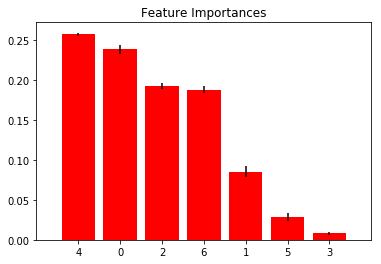

In [166]:
plt.figure()
plt.title("Feature Importances")

plt.bar(range(x_train.shape[1]), importances[indices], color="r", yerr = std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [180]:
tdf = pd.read_csv("C:/Users/HP PRO/Desktop/python/testh1.csv") #reading test dataset

In [181]:
tdf = tdf.rename(columns={'Unnamed: 0': 'ID'})
tdf['YEAR'] = tdf['YEAR'].astype(int) #converting datatype to int32
tdf['PREVAILING_WAGE'] = tdf['PREVAILING_WAGE'].astype(int)

In [182]:
tdf.head()

,ID,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,1,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016,MICHIGAN
1,2,UNIVERSITY OF MICHIGAN,CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,2016,MICHIGAN
2,3,ACUSHNET COMPANY,CHIEF EXECUTIVES,TREASURER AND COO,Y,203860,2016,"FAIRHAVEN, MASSACHUSETTS"
3,4,"PARALLELS, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200,2016,"RENTON, WASHINGTON"
4,5,"M.M.K., INC.",GENERAL AND OPERATIONS MANAGERS,DIRECTOR OF OPERATIONS,N,54059,2016,"ATLANTA, GEORGIA"


In [183]:
tdf = tdf.drop(['ID'], axis = 1) #dropping the ID column

In [184]:
tdf['FULL_TIME_POSITION'] = np.where(tdf['FULL_TIME_POSITION']=="Y", 1, 0) #mapping FULL_TIME_POSITION column to int
tdf['FULL_TIME_POSITION'] = tdf['FULL_TIME_POSITION'].astype(int)

In [185]:
tdf['SOC_NAME'] = tdf['SOC_NAME'].astype(str)
tdf['SOC_NAME'] = pd.DataFrame(tdf['SOC_NAME'].str.replace(" ","")) #removing spaces

In [186]:
tdf['EMPLOYER_NAME'] = tdf['EMPLOYER_NAME'].astype(str)
tdf['EMPLOYER_NAME'] = pd.DataFrame(tdf['EMPLOYER_NAME'].str.replace(" ",""))
tdf['EMPLOYER_NAME'] = pd.DataFrame(tdf['EMPLOYER_NAME'].str.replace(",",""))

In [187]:
tdf['JOB_TITLE'] = tdf['JOB_TITLE'].astype(str)
tdf['JOB_TITLE'] = pd.DataFrame(tdf['JOB_TITLE'].str.replace(" ",""))
tdf['JOB_TITLE'] = pd.DataFrame(tdf['JOB_TITLE'].str.replace(",",""))

In [188]:
tdf['WORKSITE'] = tdf['WORKSITE'].astype(str)
tdf['WORKSITE'] = pd.DataFrame(tdf['WORKSITE'].str.replace(" ",""))
tdf['WORKSITE'] = pd.DataFrame(tdf['WORKSITE'].str.replace(",",""))

In [189]:
#mapping the categorical value to integers
tdf['JOB_TITLE'] = tdf['JOB_TITLE'].map(djb)
tdf['SOC_NAME'] = tdf['SOC_NAME'].map(dsn)
tdf['EMPLOYER_NAME'] = tdf['EMPLOYER_NAME'].map(den)
tdf['WORKSITE'] = tdf['WORKSITE'].map(dws)

tdf.dropna()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,200469,169,156922,0,36067,2016,10322
1,200469,256,41447,1,242674,2016,10322
2,4142,256,262254,1,203860,2016,5585
3,143047,256,41165,1,187200,2016,13560
4,115435,954,69182,0,54059,2016,1234
5,184551,954,265606,1,117437,2016,11559
6,204074,954,92186,0,48339,2016,9215
7,165814,954,41447,1,74402,2016,11559
8,35460,954,267646,1,135200,2016,13895
9,33083,954,92077,0,64002,2016,15589


In [190]:
#test data
x_test = tdf

In [191]:
#X_train, X_test, y_train, y_test = train_test_split(df,y_train, test_size=0.4)

In [193]:
#predicting the output
y_predict = lm.predict(x_test)
for a in y_predict:
    if a==3:
        print("CERTIFIED")
    else:
        print("REJECTED")

CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
REJECTED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
REJECTED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
REJECTED
REJECTED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
REJECTED
CERTIFIED
CERTIFIED
CERTIFIED
REJECTED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
REJECTED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
CERTIFIED
